In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 연봉데이터 로딩, 전처리, EDA, Feature Engineering
# modeling, 성능 검증, 하이퍼파라미터 튜닝

# 기본모델: 의사결정나무(DecisionTree )- 성능 기준
# 배깅, 부스팅, 랜덤배깅 모델 튜닝

## 분석 목적: 학력, 교육, 연수, 혼인상태, 직업정보가 있는 연봉데이터셋을 이용해 연봉 예측하기
## 연봉이 5만달러 이상인지 아닌지

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/salary2.csv")
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


age: 나이<br>
workclass: 직업군<br>
education: 교육 수준<br>
education-num: 교육 연수<br>
marital-status: 결혼 상태<br>
occupation: 직업<br>
relationship: 가족 관계<br>
race: 인종<br>
sex: 성별<br>
capital-gain: 자본 소득<br>
capital-loss: 자본 손실<br>
hours-per-week: 주당 근로 시간<br>
native-country: 출신 국가<br>
class: 소득 등급<br>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [4]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [14]:
data.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [15]:
data.isna().sum() / len(data) * 100

age               0.000000
workclass         5.730724
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
class             0.000000
dtype: float64

In [30]:
data[['workclass', 'occupation','class']].groupby('class').value_counts(sort=False)

class  workclass    occupation       
<=50K  Federal-gov  Adm-clerical         329
                    Armed-Forces          10
                    Craft-repair          59
                    Exec-managerial      128
                    Farming-fishing        7
                                        ... 
>50K   State-gov    Sales                  4
                    Tech-support          13
                    Transport-moving       7
       Without-pay  Handlers-cleaners      1
                    Machine-op-inspct      1
Name: count, Length: 159, dtype: int64

In [35]:
data[data['class'] == ' >50K']['workclass'].value_counts(sort=False)

workclass
Local-gov            927
Private             7387
Self-emp-not-inc    1077
State-gov            530
Self-emp-inc         938
Federal-gov          561
Without-pay            2
Name: count, dtype: int64

In [17]:
data['workclass'].value_counts(sort=False)

workclass
Private             33906
Local-gov            3136
Self-emp-not-inc     3862
Federal-gov          1432
State-gov            1981
Self-emp-inc         1695
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [38]:
data['workclass'] = data['workclass'].fillna('Private')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


<Axes: xlabel='workclass,class'>

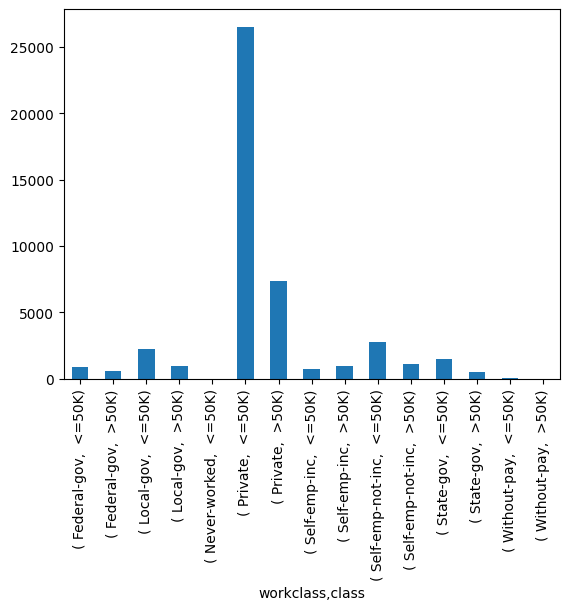

In [24]:
data.groupby('workclass')['class'].value_counts(sort=False).plot(kind='bar')

<Axes: xlabel='workclass'>

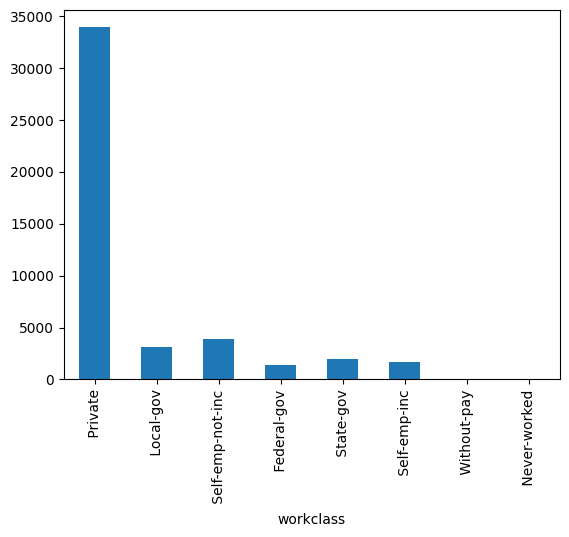

In [21]:
data['workclass'].value_counts(sort=False).plot(kind='bar')

In [42]:
data['occupation'].value_counts(sort=False)

occupation
Machine-op-inspct    3022
Farming-fishing      1490
Protective-serv       983
Other-service        4923
Prof-specialty       6172
Craft-repair         6112
Adm-clerical         5611
Exec-managerial      6086
Tech-support         1446
Sales                5504
Priv-house-serv       242
Transport-moving     2355
Handlers-cleaners    2072
Armed-Forces           15
Name: count, dtype: int64

In [40]:
data[data['class'] == ' >50K']['occupation'].value_counts(sort=False)

occupation
Protective-serv       308
Machine-op-inspct     372
Prof-specialty       2784
Exec-managerial      2908
Tech-support          420
Craft-repair         1383
Sales                1475
Other-service         204
Transport-moving      481
Adm-clerical          768
Handlers-cleaners     138
Farming-fishing       173
Priv-house-serv         3
Armed-Forces            5
Name: count, dtype: int64

In [43]:
data['occupation'] = data['occupation'].fillna('unknown')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [22]:
data['native-country'].value_counts(sort=False)

native-country
United-States                 43832
Peru                             46
Guatemala                        88
Mexico                          951
Dominican-Republic              103
Ireland                          37
Germany                         206
Philippines                     295
Thailand                         30
Haiti                            75
El-Salvador                     155
Puerto-Rico                     184
Vietnam                          86
South                           115
Columbia                         85
Japan                            92
India                           151
Cambodia                         28
Poland                           87
Laos                             23
England                         127
Cuba                            138
Taiwan                           65
Italy                           105
Canada                          182
Portugal                         67
China                           122
Nicaragua    

In [45]:
data[data['class'] == ' >50K']['native-country'].value_counts(sort=False)

native-country
United-States                 10694
Ireland                          11
El-Salvador                      11
Japan                            32
Poland                           17
England                          47
Philippines                      85
Germany                          58
Thailand                          5
Puerto-Rico                      20
Portugal                         12
China                            36
Canada                           63
India                            62
Jamaica                          15
Honduras                          2
South                            20
Ecuador                           6
Hungary                           6
Cuba                             34
Mexico                           47
Greece                           18
Yugoslavia                        8
Dominican-Republic                5
Nicaragua                         3
Haiti                             9
Italy                            34
Columbia     

In [46]:
data['native-country'] = data['native-country'].fillna('United-States')

# 결측값 처리 결과

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


# EDA

In [50]:
data[['age']].describe() 

,age
count,48842.000000
mean,38.643585
std,13.710510
min,17.000000
25%,28.000000
50%,37.000000
75%,48.000000
max,90.000000


In [54]:
11687/48842*100

23.928176569346054

In [56]:

def ages(x):
    if 10 <= x < 20:
        return "10s"
    elif 20 <= x < 30:
        return "20s"
    elif 30 <= x < 40:
        return "30s"
    elif 40 <= x < 50:
        return "40s"
    elif 50 <= x < 60:
        return "50s"
    elif 60 <= x < 70:
        return "60s"
    elif 70 <= x < 80:
        return "70s"
    elif 80 <= x < 90:
        return "80s"
    elif 90 <= x < 100:
        return "90s"

In [57]:
data['age'] = data['age'].apply(ages)

In [58]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,20s,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,30s,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,20s,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,40s,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,10s,Private,Some-college,10,Never-married,unknown,Own-child,White,Female,0,0,30,United-States,<=50K


In [59]:
data.groupby('age')['class'].value_counts(sort=False)

age  class
10s  <=50K     2507
     >50K         3
20s  <=50K    11262
     >50K       743
30s  <=50K     9468
     >50K      3461
40s  <=50K     6738
     >50K      3986
50s  <=50K     4110
     >50K      2509
60s  <=50K     2245
     >50K       809
70s  <=50K      668
     >50K       147
80s  <=50K      115
     >50K        16
90s  <=50K       42
     >50K        13
Name: count, dtype: int64

In [62]:
data.loc[data['class'] == ' >50K', 'age'].value_counts(sort=True)

age
40s    3986
30s    3461
50s    2509
60s     809
20s     743
70s     147
80s      16
90s      13
10s       3
Name: count, dtype: int64

In [67]:
data[['education-num', 'class']].groupby('class').value_counts(sort=True)

class  education-num
<=50K  1                   82
       2                  239
       3                  482
       4                  893
       5                  715
       6                 1302
       7                 1720
       8                  609
       9                13281
       10                8815
       11                1539
       12                1188
       13                4712
       14                1198
       15                 217
       16                 163
>50K   1                    1
       2                    8
       3                   27
       4                   62
       5                   41
       6                   87
       7                   92
       8                   48
       9                 2503
       10                2063
       11                 522
       12                 413
       13                3313
       14                1459
       15                 617
       16                 431
Name: count, dtype:

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  object
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  class           48842 non-null  object
dtypes: int64(4), object(10)
memory usage: 5.2+ MB


In [71]:
data['class'] = data['class'].str.replace(" >50K", '1').str.replace(" <=50K", '0')

data['class'] = data['class'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  object
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  class           48842 non-null  int32 
dtypes: int32(1), int64(4), object(9)
memory usage: 5.0+ MB


#### class
* " >50K", '1' & " <=50K", '0'

In [72]:
data_corr = data[['education-num', 'capital-gain','capital-loss','hours-per-week', 'class' ]].corr()
data_corr

,education-num,capital-gain,capital-loss,hours-per-week,class
education-num,1.000000,0.125146,0.080972,0.143689,0.332613
capital-gain,0.125146,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.080972,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.143689,0.082157,0.054467,1.000000,0.227687
class,0.332613,0.223013,0.147554,0.227687,1.000000


In [ ]:
data.deopna

# 이상치 탐지

In [74]:
search_outlier=data.describe()

In [75]:
search_outlier.loc['75%',:]+(1.5*search_outlier.loc['75%', :]- search_outlier.loc['25%', :])

education-num     21.0
capital-gain       0.0
capital-loss       0.0
hours-per-week    72.5
class              0.0
dtype: float64

## capital-gain	capital-loss	  히스토그램그리기
### hours-per-week 이상값을 가진 데이터 찾아보기